# Pandas

Pandas is a powerful open-source Python library that provides flexible and efficient tools for working with structured data. We're going to use it to clean and transform data to get the outputs we want.

# Install

Pandas should already be installed on your environment. If it's not, you'll need to run the cell below to install it, which might take a few minutes.

In [86]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


# Import

To use pandas and all the methods it has we need to import it to our environment. Run this cell first to check you have it installed, if not, run the one above.

In [87]:
import pandas as pd

# Check pandas version
print(f"Pandas version: {pd.__version__}")

Pandas version: 2.2.3


# Create a dataframe

First, we will need a dataframe to work with. The easiest thing to do is create our own!

Here's how to manually create a pandas dataframe:

In [88]:
df = pd.DataFrame({
    "numbers": [1, 2, 3],
    "letters": ["A", "B", "C"],
    "fruits": ["apples", "bananas", "cherries"]
})

Notebooks allow us to see the dataframe in a rich text format, all we need to do is run the variable.

In [89]:
df

,numbers,letters,fruits
0,1,A,apples
1,2,B,bananas
2,3,C,cherries


Want to add a column? Easy.

In [90]:
df["vegetables"] = ["artichokes", "brussel sprouts", "cabbages"]
df

,numbers,letters,fruits,vegetables
0,1,A,apples,artichokes
1,2,B,bananas,brussel sprouts
2,3,C,cherries,cabbages


Remove a column? Also easy.

In [91]:
df = df.drop("numbers", axis=1) # axis is 0 (rows) by default
df

,letters,fruits,vegetables
0,A,apples,artichokes
1,B,bananas,brussel sprouts
2,C,cherries,cabbages


If we had many columns we could also select the columns we wanted to keep:

In [92]:
df = df[["fruits", "vegetables"]] # Using the double square bracket
df

,fruits,vegetables
0,apples,artichokes
1,bananas,brussel sprouts
2,cherries,cabbages


Let's import some data from elsewhere: use the `pd.read_csv()` method.

What do you notice about the data?

In [93]:
file_path = "pandas_data.csv"
data_df = pd.read_csv(file_path)
data_df

,Age,Sex,Mass
0,52.0,1.0,72.1
1,39.0,0.0,85.4
2,45.0,1.0,55.7
3,NaN,1.0,68.2
4,66.0,1.0,62.3
5,74.0,1.0,92.8
6,60.0,0.0,77.4
7,23.0,0.0,NaN
8,35.0,1.0,63.1
9,59.0,1.0,NaN


Hopefully you noticed the missing values! We will call these Nulls.

Let's find out more about the dataframe using these methods:

In [94]:
data_df.info() # This tells us some info about the columns, their type and number of null values
data_df.describe() # This tells us more statistical information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     23 non-null     float64
 1   Sex     23 non-null     float64
 2   Mass    21 non-null     float64
dtypes: float64(3)
memory usage: 708.0 bytes


,Age,Sex,Mass
count,23.000000,23.000000,21.000000
mean,44.913043,1.000000,65.109524
std,20.538020,1.809068,20.672056
min,1.000000,0.000000,5.300000
25%,34.000000,0.000000,58.600000
50%,46.000000,1.000000,67.400000
75%,60.500000,1.000000,77.400000
max,74.000000,9.000000,92.800000


Null values can cause a lot of trouble in our code, so we have to be careful how to handle them.

For our purpose, let's bin them. 

In [95]:
data_df = data_df.dropna() # This will drop any rows with a Null value
data_df.info() # comparing to above, you can see they have been dropped.

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     19 non-null     float64
 1   Sex     19 non-null     float64
 2   Mass    19 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes


# Duplicates

We can't know unless we try, but we should remember when cleaning data that it is possible for some of it to be duplicated.

We can look for duplicates, and then drop them.

In [96]:
data_df.duplicated() # Prints out a boolean value if each row is duplicated or not

0     False
1     False
2     False
4     False
5     False
6     False
8     False
10    False
11    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
21     True
22    False
23    False
dtype: bool

In [97]:
data_df = data_df.drop_duplicates() # This will drop any duplicate rows
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     18 non-null     float64
 1   Sex     18 non-null     float64
 2   Mass    18 non-null     float64
dtypes: float64(3)
memory usage: 576.0 bytes


# Sort and filter dataframes

We can sort and filter dataframes based on any condition:

In [98]:
data_df = data_df.sort_values(["Age", "Sex"], ascending=True) # ascending is True by default
data_df

,Age,Sex,Mass
22,1.0,0.0,5.3
23,10.0,1.0,24.3
11,15.0,0.0,54.2
17,28.0,1.0,52.1
18,33.0,1.0,67.4
8,35.0,1.0,63.1
1,39.0,0.0,85.4
2,45.0,1.0,55.7
15,46.0,0.0,71.5
10,48.0,1.0,74.3


In [99]:
data_df = data_df[data_df["Age"] >= 18] # Filtering for rows where the Age column is more than or equal to 18
data_df

,Age,Sex,Mass
17,28.0,1.0,52.1
18,33.0,1.0,67.4
8,35.0,1.0,63.1
1,39.0,0.0,85.4
2,45.0,1.0,55.7
15,46.0,0.0,71.5
10,48.0,1.0,74.3
0,52.0,1.0,72.1
13,55.0,1.0,62.0
6,60.0,0.0,77.4


We can filter for multiple things at once, and sort at the end, watch the brackets:

In [100]:
data_df = data_df[(data_df["Age"] >= 18) & (data_df["Mass"] >= 60) & (data_df["Sex"].isin([1, 0]))].sort_values("Mass")
data_df

,Age,Sex,Mass
13,55.0,1.0,62.0
4,66.0,1.0,62.3
8,35.0,1.0,63.1
18,33.0,1.0,67.4
15,46.0,0.0,71.5
0,52.0,1.0,72.1
10,48.0,1.0,74.3
6,60.0,0.0,77.4
1,39.0,0.0,85.4
16,61.0,0.0,90.7


# Grouping

Below, we are grouping on the "Sex" column, to find out how many instances there are of each value.

We then reset the index and rename the count column.

In [101]:
grouped_data_df = data_df.groupby(["Sex"]).size().reset_index(name="Count")
grouped_data_df

,Sex,Count
0,0.0,4
1,1.0,7


# Joining

Sometimes we might need to join dataframe together, for example to get the exact names of trusts basd off of their codes.

Here there is another dataframe with the code of 0 and 1 to indicate Male and Female. We'll join it onto the data_df we have been working with.

Joining dataframes together is simple, we just need to pick which columns to merge on.

In [102]:
sex_indicator_df = pd.DataFrame({
    "code": [0, 1],
    "sex": ["Male", "Female"]
})

sex_indicator_df

,code,sex
0,0,Male
1,1,Female


In [103]:
joined_df = pd.merge(data_df, sex_indicator_df, left_on='Sex', right_on='code', how='inner')
joined_df

,Age,Sex,Mass,code,sex
0,55.0,1.0,62.0,1,Female
1,66.0,1.0,62.3,1,Female
2,35.0,1.0,63.1,1,Female
3,33.0,1.0,67.4,1,Female
4,46.0,0.0,71.5,0,Male
5,52.0,1.0,72.1,1,Female
6,48.0,1.0,74.3,1,Female
7,60.0,0.0,77.4,0,Male
8,39.0,0.0,85.4,0,Male
9,61.0,0.0,90.7,0,Male


And now we can drop any columns we don't want anymore!

In [104]:
joined_df = joined_df.drop(['Sex', 'code'], axis=1)
joined_df

,Age,Mass,sex
0,55.0,62.0,Female
1,66.0,62.3,Female
2,35.0,63.1,Female
3,33.0,67.4,Female
4,46.0,71.5,Male
5,52.0,72.1,Female
6,48.0,74.3,Female
7,60.0,77.4,Male
8,39.0,85.4,Male
9,61.0,90.7,Male


# Graphs

Pandas dataframes allows us to make some quick and dirty graphs! We'll use a library called `matplotlib.pyplot` to help us. 



<Axes: title={'center': 'Age vs Mass'}, xlabel='Mass'>

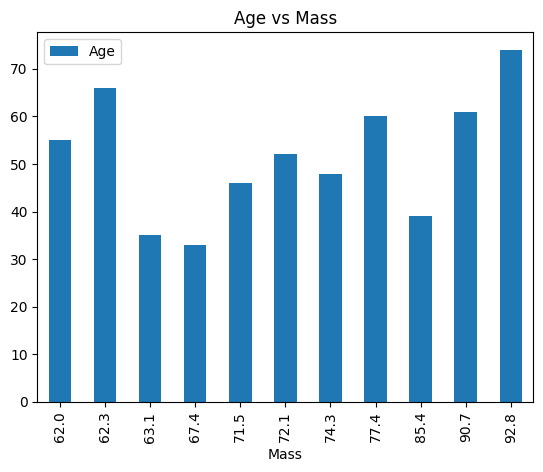

In [105]:
joined_df.plot(x='Mass', y='Age', kind='bar', title='Age vs Mass')